In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Генерация случайных величин, нормальное распределение

In [2]:
norm_rv = stats.norm(loc=0, scale=1) #мат ожидание 0, дисперсия 

rvs - сгенерирует выборку из срапределния объема size

cdf - вычилсит для нас значение фнукции распределния
(cumultative distribution fuction) в указанной точке

pdf - вычислит значение плотности распределения 
(probability density function) в указанной точке

ppf - вычилсти квантиль указанного уровня

In [3]:
sample = norm_rv.rvs(1000)

In [4]:
norm_rv.pdf(1)

0.24197072451914337

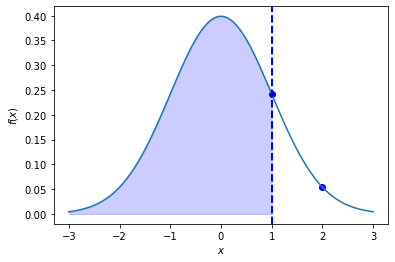

In [5]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.scatter([1, 2], [norm_rv.pdf(1), norm_rv.pdf(2)], color = "blue");
np.linspace(-3, 1)
xq = np.linspace(-3, 1, 100)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color = 'blue', alpha = 0.2)
plt.axvline(1, color = 'blue', linestyle ="--", lw =2)

Значение функции распределения в точке 1.

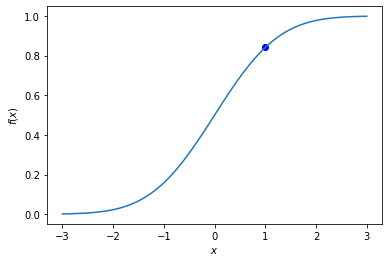

In [6]:
np.linspace(-3, 3, 100)
cdf = norm_rv.cdf(x)

plt.plot(x, cdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.scatter([1], [norm_rv.cdf(1)], color = "blue")

На плотности распределения это выглядит как площадь точки 1, то есть вероятность того, что X<=1

найдем вероятность, что P(1<X<3) 

In [7]:
norm_rv.cdf(3) - norm_rv.cdf(1)

0.15730535589982697

это вероятность попасть в конкретный отрезок, изобразим ее на плотности распределения

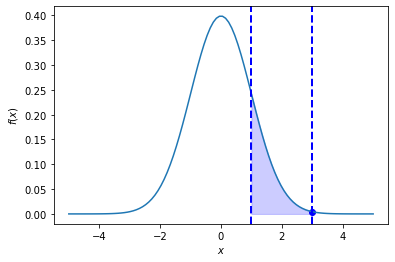

In [8]:
x= np.linspace(-5,5,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.scatter([3], [norm_rv.pdf(3)], color='blue')

xq = np.linspace(1, 3)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color = 'blue', alpha = 0.2)
plt.axvline(1, color='blue', linestyle="--", lw=2)
plt.axvline(3, color='blue', linestyle="--", lw=2)

In [9]:
q = norm_rv.ppf(0.25)
print(q)
print(norm_rv.pdf(-1))

-0.6744897501960817
0.24197072451914337


# Эмперическое распределение

Работа с выборкой. Обычно не известно, из какаого распределения она пришла. Можно посчитать какие-нибудь характеристики для нашей случайной величины.

In [10]:
sample[:10]

array([-0.59032242,  1.27734458, -0.41165751, -2.0261273 ,  0.42059789,
       -0.31320761, -0.72008115,  0.67637637,  1.16160106,  0.26258173])

In [11]:
sample.shape

(1000,)

In [12]:
np.mean(sample) #выборочное среднее при больших размерах похожа на мат ожидание

-0.027061987186391998

In [13]:
np.var(sample) #дисперсия

1.027094430725007

In [14]:
np.std(sample) #выборочное стандартное отклонение

1.013456674320618

In [15]:
np.median(sample) #выборочная медиана

-0.00352934030170503

Гистограмма - эмпирическая оценка для плотности распределения

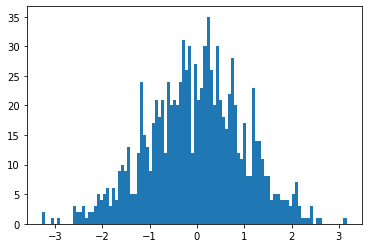

In [16]:
plt.hist(sample, bins = 100);

Гистограмма и плотность на одноай картинке

Text(0.5, 0, '$x$')

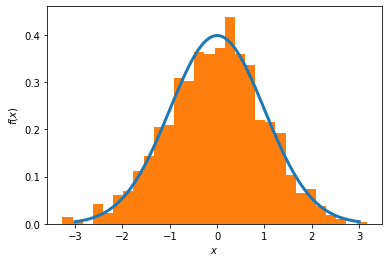

In [17]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x) #значение плотности в каждой точке

#плотность
plt.plot(x, pdf, lw=3)

#гистограмма, параметр density отнормировал ее.
plt.hist(sample, bins = 30, density = True);
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

По выборке эмперическая функция распределения

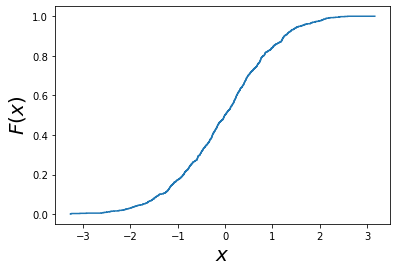

In [18]:
#для посторения ECDF библиотека statsmodels
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(sample) #эмпирическая функция по выборке

plt.step(ecdf.x, ecdf.y)
plt.ylabel('$F(x)$', fontsize = 20)
plt.xlabel('$x$', fontsize =20);

# Генерация выборок

In [19]:
np.arange(1, 11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [20]:
np.random.choice(np.arange(1,11), 
                 size = 5,
                replace = False)

array([6, 3, 2, 8, 1])

In [21]:
np.random.choice(['карась', 'плотва','щука'],
                size = 10,
                p=[0.5, 0.2, 0.3]) #с повторениями

array(['щука', 'плотва', 'карась', 'щука', 'карась', 'карась', 'карась',
       'плотва', 'щука', 'карась'], dtype='<U6')

# Зерна
Если выполнить команду stats.norm(loc=3, scale=2).rvs(5) на двух разных пк или два раза на одном и том же, то результат будет разный

In [22]:
stats.norm(loc=3, scale=2).rvs(5)


array([6.55315695, 5.18762007, 2.62852485, 2.94933022, 2.39059437])

In [23]:
stats.norm(loc=3, scale=2).rvs(5)

array([2.98416922, 3.8495694 , 3.05890078, 1.27724675, 1.60634077])

In [24]:
 minsample = norm_rv.rvs(100)

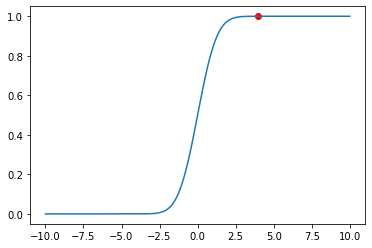

In [25]:
x1 = np.linspace(-10, 10, 1000)
cdf2 = norm_rv.cdf(x1)
plt.plot(x1, cdf2)
plt.scatter([4, ],[norm_rv.cdf(4)], color = 'red')

# Описательные статистики + пандас
Данные

In [26]:
df = pd.read_csv('youtube_data_short.csv', sep = '\t')

In [27]:
print(df.shape)
df[105:110]

(19124, 10)


,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
105,"""Первая четверть"" Юбилейный концерт в Олимпийс...",11.0,0.0,125.0,rock,арбенина,2225.0,NaN,NaN,8
106,"""Первая четверть"" юбилейный концерт Дианы Арбе...",43.0,3.0,399.0,rock,арбенина,3177.0,NaN,NaN,0
107,"""Перелётная птица"" [Москва, 2012г.]",2.0,3.0,56.0,shanson,ирина_круг,8325.0,2.0,0.0,1984
108,"""Пока ещё не поздно"". Михаил Круг. Жизнь и люб...",7.0,7.0,108.0,shanson,ирина_круг,29928.0,5.0,0.0,2148
109,"""Пока ещё не поздно"". Михаил Круг. Любовь и см...",15.0,11.0,158.0,shanson,ирина_круг,27185.0,9.0,0.0,2148


In [28]:
df.dtypes

title                    object
commentCount            float64
dislikeCount            float64
likeCount               float64
music_style              object
performer                object
viewCount               float64
commentators_uniq       float64
comments_obscene_cnt    float64
video_age                 int64
dtype: object

# Описательные статистики

Макс и мин значения
максимальное и минимальное кол-во лайков под видео

In [29]:
df.likeCount.head()

0     1402.0
1    10532.0
2      269.0
3      163.0
4      597.0
Name: likeCount, dtype: float64

In [30]:
df.likeCount.values.mean() #nan - так как есть null значения

nan

In [31]:
df.likeCount.max()

1686810.0

In [32]:
df['likeCount'].min()

0.0

In [33]:
mx = df.likeCount.max()
df[df.likeCount == mx]

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
18649,Элджей & Feduk - Розовое вино,191702.0,151772.0,1686810.0,rap,feduk,208753182.0,3702.0,183.0,485


In [34]:
df.likeCount.mean()

5735.014482758621

In [35]:
df.likeCount.median()

100.0

<AxesSubplot:>

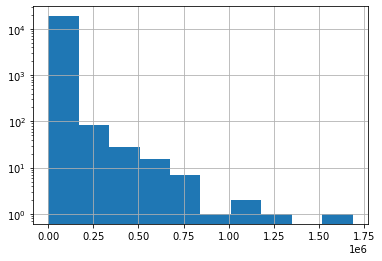

In [36]:
df.likeCount.hist(bins=10, log= True)

Выборы - зло. 

# Меры разброса
Дисперсия и стандартное отклонение

In [37]:
df.likeCount.var(ddof=0) #аргумент - на что надо делить, если ставим ноль, то деление идет на n, если 1 то на n-1
# дисперсия, variance

1513365309.7446747

In [38]:
df.likeCount.var(ddof=1) #несмещенный вариант

1513445598.635849

In [39]:
df.likeCount.std(ddof=0) #стандартное отклонение, standart deviation 

38901.99621799214

In [40]:
df.likeCount.std(ddof=1) #несмещенный вариант

38903.02814223912

# Квантили

In [41]:
df.likeCount.quantile(0.99)

128146.6499999979

Выходит, что у 99% видео из выборки меньше 128146 лайков, и у 1% - больше. Выведем самых залайканные жанры из этого 1%

In [42]:
q = df.likeCount.quantile(0.99) #находим квантиль, левее него 99%. Значит все, что выше его и он сам входят в 1%. 
# таким образом, мы можем найти 1% самых лайкнутых видео на ютубе


In [43]:
x = df[df.likeCount > q].music_style
x.value_counts() #самые залайканые жанры

rap        108
popsa       36
rock        19
classic     18
indi         7
estrada      1
Name: music_style, dtype: int64

Посчитать все сразу

In [44]:
df.describe()

,commentCount,dislikeCount,likeCount,viewCount,commentators_uniq,comments_obscene_cnt,video_age
count,18914.000000,18850.000000,1.885000e+04,1.912300e+04,12314.000000,12314.000000,19124.000000
mean,394.026065,745.344297,5.735014e+03,8.436486e+05,131.594608,8.952899,1389.772642
std,4200.463284,9339.777800,3.890303e+04,6.382348e+06,333.584804,37.887947,1054.261698
min,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
25%,0.000000,1.000000,1.800000e+01,1.915000e+03,4.000000,0.000000,378.000000
50%,5.000000,5.000000,1.000000e+02,1.135300e+04,13.000000,0.000000,1213.000000
75%,35.000000,38.000000,6.367500e+02,8.180900e+04,61.000000,2.000000,2218.000000
max,303077.000000,640698.000000,1.686810e+06,2.720477e+08,3702.000000,693.000000,4574.000000


In [45]:
#если добавить (include='object') посчитает данные характеристики переменными, обладающими типом 'object'
df.describe(include='object')

,title,music_style,performer
count,19124,19124,19124
unique,18029,7,111
top,Алексей Кортнев и Валдис Пельш в проекте «Две ...,rock,николаев
freq,11,5888,566


# Группировка
Если бы нас попросили посчитать, какое среднее чилос лайков ставят под видео разных жанров, мы могли бы узнать ответ с помощью срезов

In [48]:
df[df.music_style == 'rap'].likeCount.mean()

26802.456253089473

Для каждого жанра придется сделать срез, для этого придется сделать много срезво, что не очень удобно

Для таких ситуаций есть группировки. Метод groupby

In [49]:
df.groupby('music_style').likeCount.mean()

music_style
classic    28663.333333
estrada      938.686662
indi        2471.842299
popsa       7492.273792
rap        26802.456253
rock        2132.887061
shanson      440.390564
Name: likeCount, dtype: float64

 Сделать срез к каждому атрибуту колонки music_style, и для каждого среза найти среднее

В качестве  аргумента в этой переменной нужно указать по каким переменным мы хотели бы осущетсвить группировку применяемой функции. В данной ситуации это жанр.

Можно делать groupby по нескольким колонкам, получить результаты по колонкам и даже применять енсколько функций за раз

Так же можно использовать функцию агрегации:

In [54]:
df.groupby(['music_style', 'performer'])[['likeCount', 'dislikeCount']].agg(['mean', 'count'])

likeCount       dislikeCount      
                                       mean count         mean count
music_style performer                                               
classic     classical_channel  28663.333333   297  1236.228956   297
estrada     агутин                39.333333     3     4.666667     3
            басков              1582.721311   122   233.270492   122
            буйнов                 2.795455    44     0.727273    44
            ваенга               133.773360   503     9.310139   503
...                                     ...   ...          ...   ...
shanson     жека                 505.681159   138    49.702899   138
            ирина_круг          1520.352381   105   185.847619   105
            михаил_круг          418.111340   485    44.216495   485
            трофимов             252.857759   232    15.478448   232
            шуфутинский          357.132565   347    17.040346   347

[111 rows x 4 columns]

In [55]:
(df['commentators_uniq'] > 0).sum()

12314

# Apply
Можно применить к каждому объекту ячейки одну и ту же функцию. Это можно сделать методом apply. Посчитаем число букв в названии каждого клипа из таблицы:

In [56]:
name = 'natasha'
len(name)

7

In [59]:
df.title.apply(len).mean()

35.293871574984315

Можно написать свою функцию и применить ее к колонке. Например, вот так можно достать первую букву каждого имени:

In [62]:
m_func = lambda name: name[0]
example = 'Настя'
m_func(example)

'Н'

In [63]:
df.title.apply(m_func)[:-10]

0        "
1        "
2        "
3        "
4        "
        ..
19109    т
19110    т
19111    ч
19112    ш
19113    щ
Name: title, Length: 19114, dtype: object

Визуализации.
# Гистограммы

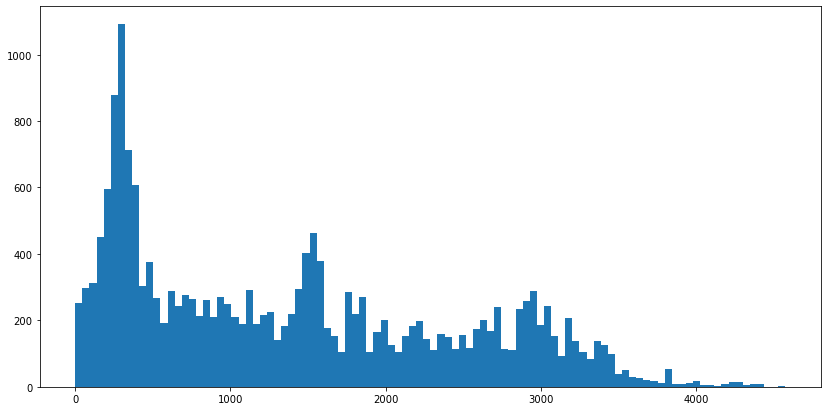

In [66]:
plt.figure(figsize=(14,7)) # меняет размер 
plt.hist(df['video_age'], bins =100);

Можно сглаживать распределение

Text(0.5, 1.0, 'Распределение возраста видео')

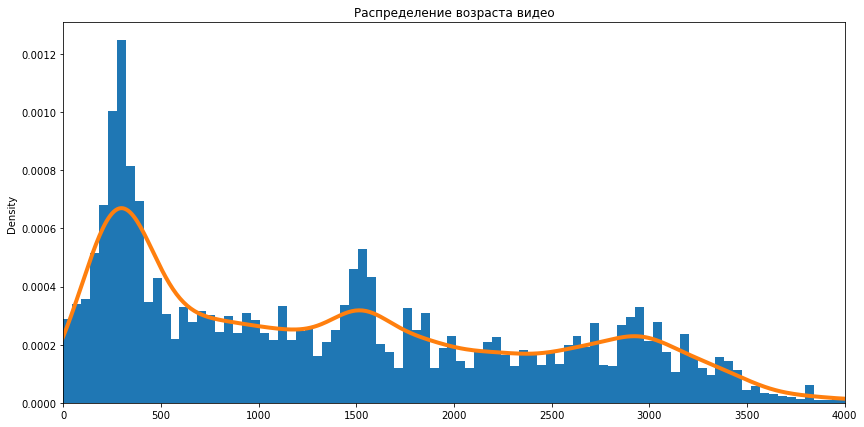

In [70]:
plt.figure(figsize=(14,7))
df['video_age'].hist(bins=100, density=True)
df['video_age'].plot(kind='kde', linewidth=4) # kde
# ядерная оценка плотности
plt.xlim(0, 4000)
plt.title('Распределение возраста видео')

Можно построить сразу несколько гистограмм

array([[<AxesSubplot:title={'center':'viewCount'}>,
        <AxesSubplot:title={'center':'likeCount'}>],
       [<AxesSubplot:title={'center':'dislikeCount'}>, <AxesSubplot:>]],
      dtype=object)

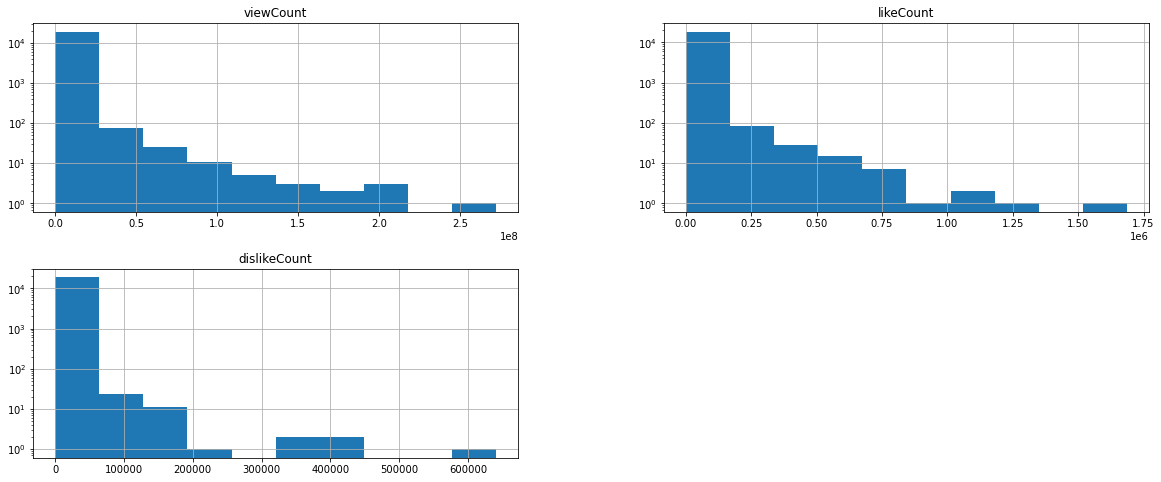

In [73]:
columns = ['viewCount', 'likeCount', 'dislikeCount']
df[columns].hist(figsize=(20, 8), log = True)

Много выбросов во всех колонках. Для того, чтобы их невилировать можно построить гистограммы для логарифмов показателей. Обычно логарифмирование используется для того, чтобы сгладить выбросы и сделать данные более гладкими. Более того, на основе логарифма можно придумать преобразование, которое нормализует данные.

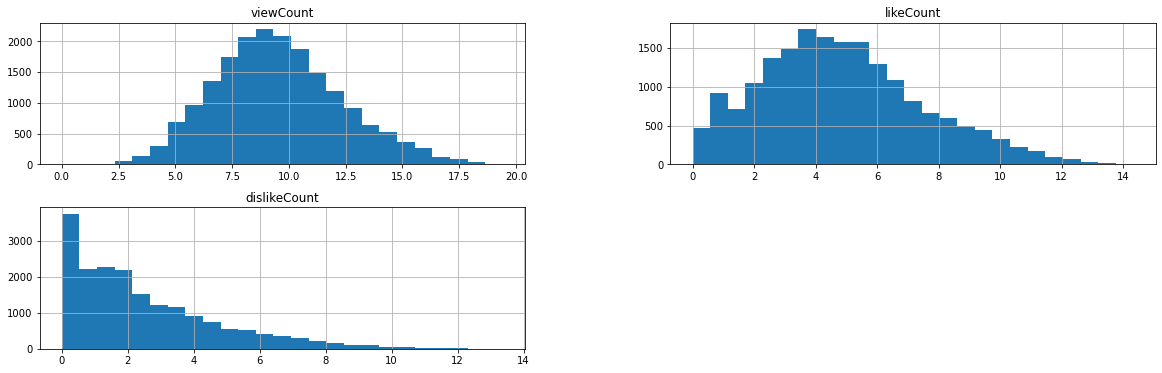

In [75]:
df[columns].apply(lambda x: np.log(x+1)).hist(figsize=(20, 6), bins=25);

In [78]:
df[columns].apply(lambda x: np.log(x+1)) 
#данные прологорифмированные, логарифм применяется часто
#операция, нормализующая наблюдения
#сглаживать данные полезно, чтобы алгоритмы мл не переобучались под выбросы

,viewCount,likeCount,dislikeCount
0,12.275142,7.246368,3.784190
1,14.613657,9.262268,6.538140
2,10.604801,5.598422,2.397895
3,9.384966,5.099866,2.079442
4,11.423919,6.393591,2.995732
...,...,...,...
19119,7.010312,2.484907,0.000000
19120,12.878601,7.516433,6.068426
19121,13.987227,10.328886,9.648273
19122,9.225032,5.564520,2.397895


# 6.Усатые ящики

In [79]:
df_log = df[columns].apply(lambda x: np.log(x+1)) #прологорифмировали
df_log['music_style'] = df['music_style'] #заведем в прологорифмированном датасете колонку стиля музыки
df_log.head()

,viewCount,likeCount,dislikeCount,music_style
0,12.275142,7.246368,3.784190,popsa
1,14.613657,9.262268,6.538140,popsa
2,10.604801,5.598422,2.397895,popsa
3,9.384966,5.099866,2.079442,popsa
4,11.423919,6.393591,2.995732,popsa


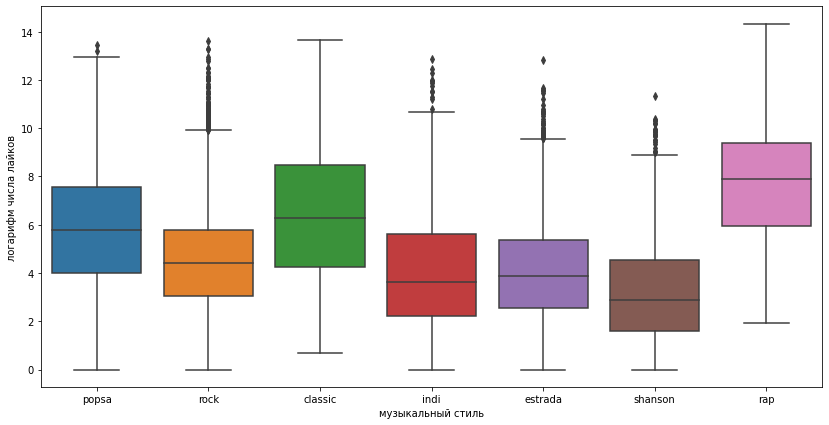

In [81]:
#построем ящик с усами для каждого музыкального стиля
plt.figure(figsize = (14,7))
sns.boxplot(x='music_style', y ='likeCount', data= df_log)
plt.xlabel('музыкальный стиль')
plt.ylabel('логарифм числа лайков');